# Problem statement
- we are Implementing Custom RandomSearchCV without using Build in library's randomsearchCV function...

# RandomSearchCV  with 3_fold CV on KNN

# Data generation

In [1]:
#importing libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

#data generation using sklearn
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


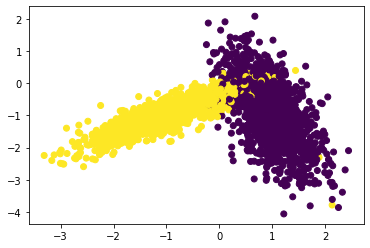

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0], x_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [11]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors

from sklearn.metrics import accuracy_score

def RandomSearchCV(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []    
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        indices=list(range(0, len(x_train)))                #all indices of train data
        size_of_test_data=len(x_train)//folds               #test data set size is determined by number of folds needed and size of train dataset
        
        for j in range(0, len(x_train), size_of_test_data):
            # check this out: https://stackoverflow.com/a/9755548/4084039
                        
            
            test_indices  = indices[j:j+size_of_test_data]         #test indices choosen using step size of "size_of_test_data"
            train_indices = list(set(list(range(1, len(x_train)))) - set(test_indices))

            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)                           #fitting the model with train data

            Y_predicted = classifier.predict(X_test)                  #tesing with test data
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)                 #testing with train data
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))      #finding mean score for the 3 models with all 3 fold data
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.12it/s]


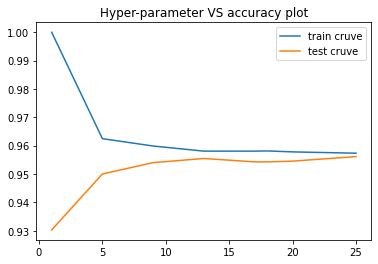

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from numpy import random
random.seed(100)
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()

param_range=(1,30)                                                        #defining hyperparamer range
params=[]
number_of_samples=10                                                      #number of samples for "k" 
for i in range(0,number_of_samples):
    params.append(round(random.uniform(param_range[0],param_range[1])))   #uniformly we are doing random sampling
params.sort()                                                             #to make the plotting of the result looks neat,we do sorting
#print(params)

folds = 3                                                                 #number of folds we need for cross validation
trainscores,testscores = RandomSearchCV(x_train, y_train, neigh, params, folds)


#plt.ylim([0.90, 1])
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

# observation 

   ### From the above plot we can see that optimal k value is 24...Because at k=24 the accuracy for both training data and test data is high and very close to each other. 

In [16]:
#drawing decision boundary for the model to which we got best "K" value
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

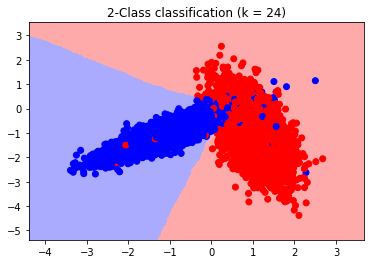

In [17]:
#decision boundary of knn model with k value as 24
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 24)
neigh.fit(x_train, y_train)
plot_decision_boundary(x_train[:, 0], x_train[:, 1], y_train, neigh)